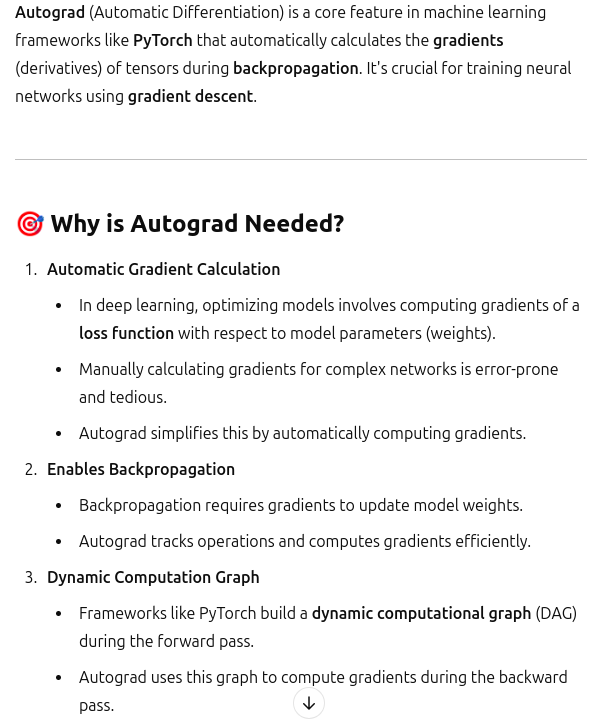

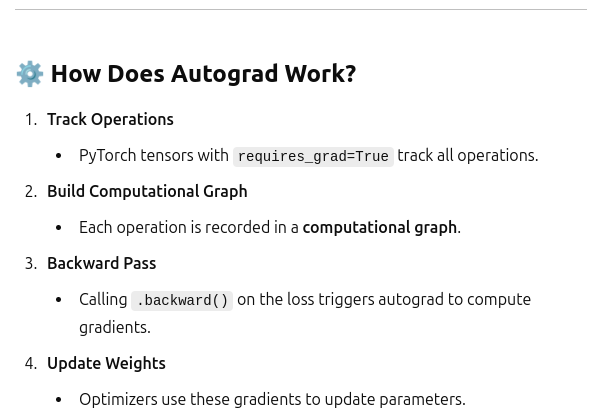

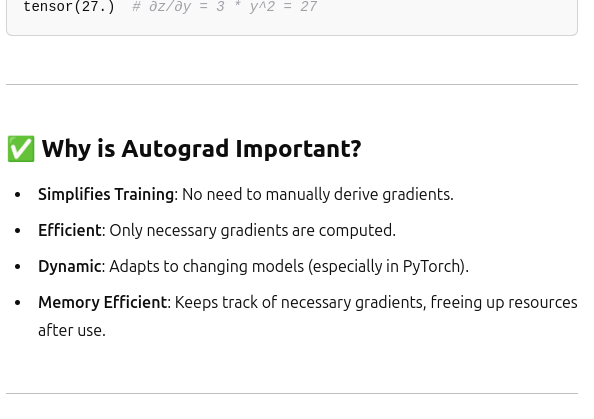

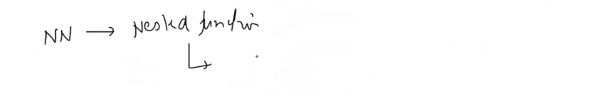

 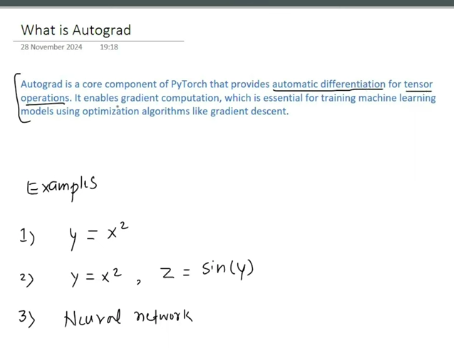

 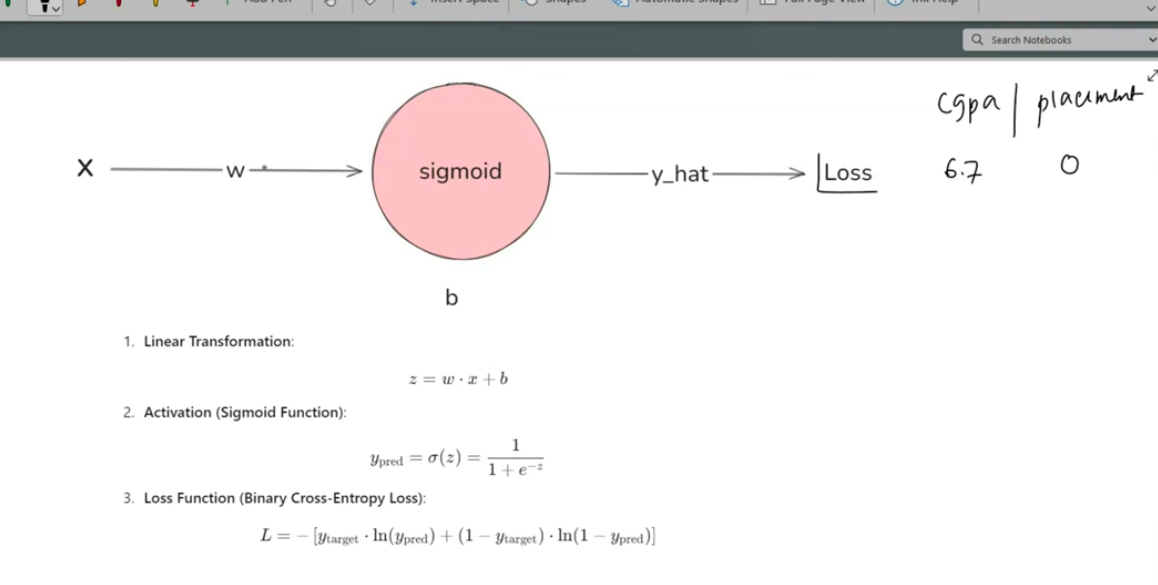

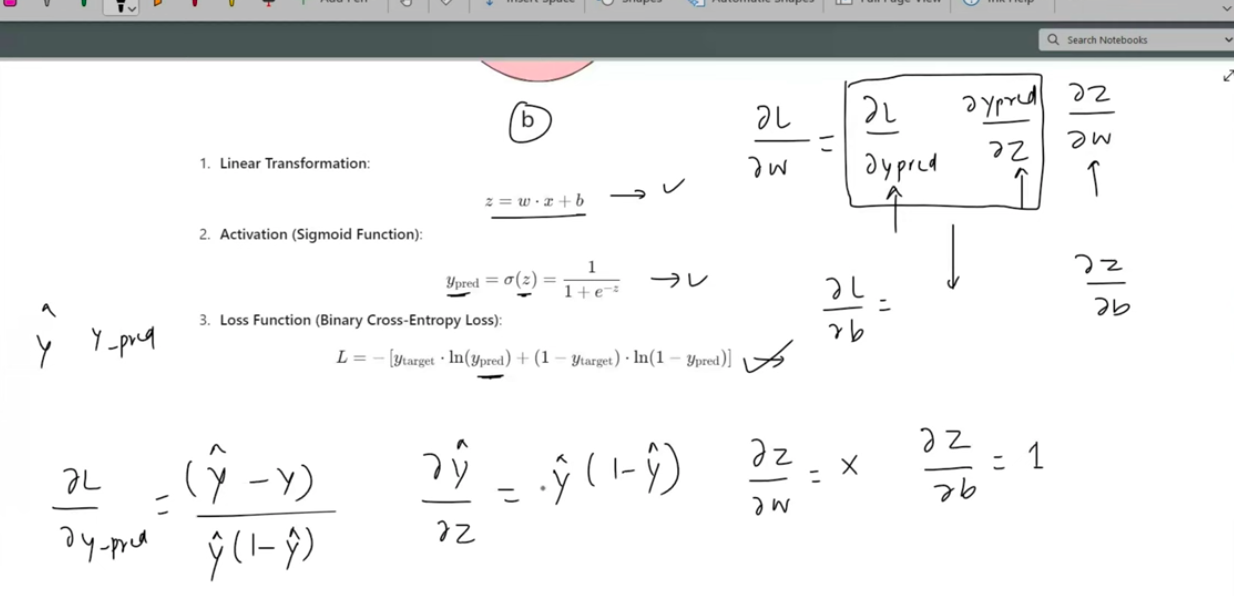

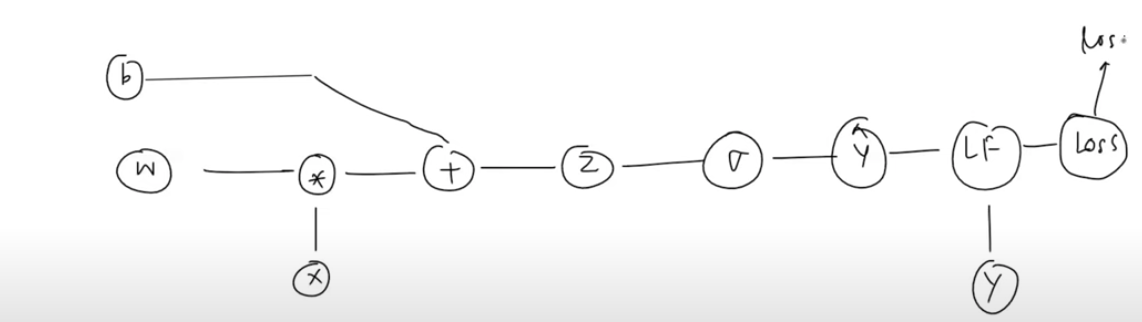

# how the forward and backprogation work in pytorch with autograd

In [19]:
def dy_dx(x):
    return 2*x

In [20]:
dy_dx(3)

6

In [21]:
import torch


In [22]:
x = torch.tensor(3.0,requires_grad=True) # this is became grad function


In [23]:
y = x**2

In [24]:
y

tensor(9., grad_fn=<PowBackward0>)

In [25]:
y.backward()

In [26]:
x.grad

tensor(6.)

In [27]:
import math

In [29]:
def dz_dx(x):
    return 2*x*math.cos(x**2)

In [30]:
dz_dx(4)

-7.661275842587077

In [31]:
x = torch.tensor(4.0,requires_grad=True)

In [32]:
y = x**2

In [34]:
z = torch.sin(y)

In [35]:
x

tensor(4., requires_grad=True)

In [36]:
y

tensor(16., grad_fn=<PowBackward0>)

In [37]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [38]:
x.grad

# crease single input NN and performe the farward and backward propagation

In [53]:
x = torch.tensor(6.7)  # input
y = torch.tensor(0) # 0utput

# initial weight and biases

w = torch.tensor(1.0)
b = torch.tensor(0)



In [54]:
# first will by code and then we will same thing in grad


def binary_cross_entropy_loss(prediction,actual):
    epsilon = 1e-8 # to prevenent the log
    prediction = torch.clamp(prediction,epsilon,1-epsilon)
    return -(actual*torch.log(prediction) + (1-actual)*torch.log(1-prediction))

In [55]:
z = w*x +b 
y_pred  = torch.sigmoid(z)
y_pred

tensor(0.9988)

In [56]:
loss = binary_cross_entropy_loss(y_pred,y)
loss

tensor(6.7012)

In [57]:
# Derivatives

# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)

dloss_dy_pred  = (y_pred-y)/(y_pred)*(1-y_pred)
print(dloss_dy_pred)

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)

dy_pred_dz = y_pred*(1-y_pred)
print(dy_pred_dz)


# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x
dz_db = 1

dL_dw = dloss_dy_pred*dy_pred_dz*dz_dw
dL_db = dloss_dy_pred*dy_pred_dz*dz_db


print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

tensor(0.0012)
tensor(0.0012)
Manual Gradient of loss w.r.t weight (dw): 1.0115162695001345e-05
Manual Gradient of loss w.r.t bias (db): 1.5097258483365295e-06


In [67]:
# Same thing with AutoGrad

x = torch.tensor(6.7)  # input
y = torch.tensor(0) # 0utput

# initial weight and biases

w = torch.tensor(1.0,requires_grad=True)
b = torch.tensor(0.0,requires_grad=True)

In [68]:
w

tensor(1., requires_grad=True)

In [69]:
b

tensor(0., requires_grad=True)

In [70]:
z = w*x+b
print(z)

tensor(6.7000, grad_fn=<AddBackward0>)


In [71]:
y_pred = torch.sigmoid(z)

In [72]:
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [73]:
loss = binary_cross_entropy_loss(y_pred,y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [74]:
loss.backward()

In [75]:
print(loss)

tensor(6.7012, grad_fn=<NegBackward0>)


In [76]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


In [78]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = (x**2).mean()

In [79]:
y.backward()
x.grad

tensor([0.6667, 1.3333, 2.0000])

In [80]:
# clearing grad
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [81]:
y= x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [82]:
y.backward()

In [83]:
x.grad

tensor(4.)

In [84]:
x.grad.zero_()

tensor(0.)

In [85]:
x = torch.tensor(2.0,requires_grad=True)
x

tensor(2., requires_grad=True)

In [86]:
y = x**2

In [87]:
y

tensor(4., grad_fn=<PowBackward0>)

In [88]:
y.backward()

In [89]:
x.grad

tensor(4.)

# in prediction do not need the backward propagation so we need the 
# remove the grad from the grad


### option 1 - requires_grad_(False)
### option 2 - detach()
### option 3 - torch.no_grad()

In [91]:
x.requires_grad_(False)

tensor(2.)

In [92]:
x


tensor(2.)

In [93]:
y = x**2
y

tensor(4.)

In [ ]:
y.backward() # error because we already remove the grad 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [97]:
x = torch.tensor(2.0, requires_grad=True)
x

z = x.detach()
z

tensor(2.)

In [98]:

y = x ** 2

y1 = z ** 2
y1

tensor(4.)

In [99]:
y.backward()

In [100]:
y1.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn